### Logistic Regression can be used for:
- Binary Classification
- Multi-Class Classification
- One-vs-Rest Classification
### Assumpion of LogisticRegression
1. The dependant variable must be Categorical in nature

2. There should be no outliers in the data

3. There should be no high correlations amoung the independant variables. This can be checked using a correlation matrics

In [17]:
### Importing liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , LabelEncoder , MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix,recall_score ,classification_report,precision_score , f1_score

In [18]:
### Importing DataSet
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


<Axes: >

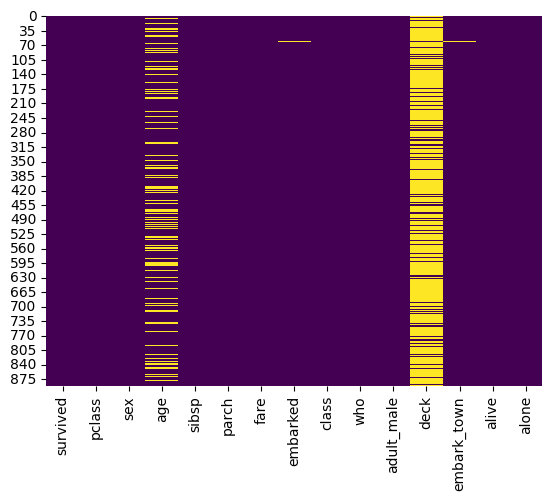

In [19]:
### Checking the missing columns
sns.heatmap(df.isnull()  , cbar=False , cmap='viridis')


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [21]:
### Preprocessing
#Remove the Deck column
df.drop('deck' , axis=1 , inplace=True)

# impute the missing values in age and fare
df["age"].fillna(df["age"].median() , inplace=True)
df["fare"].fillna(df["fare"].median() , inplace=True)

# impute missing values in embarked town and embarked
df["embarked"].fillna(df["embarked"].mode()[0] , inplace=True)
df["embark_town"].fillna(df["embark_town"].mode()[0] , inplace=True)







<ipython-input-21-aa6551e0b82f>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["age"].fillna(df["age"].median() , inplace=True)
<ipython-input-21-aa6551e0b82f>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [22]:
### Encode the Categorical Variable using for loop where object and category are given
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype.name == 'category' :
        df[i] = LabelEncoder().fit_transform(df[i])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [23]:
### X and y Column

X = df.drop(columns=['survived'] , axis=1)
y = df['survived']

In [24]:
### Train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [25]:
### Model Call
model = LogisticRegression()

In [26]:
### Train the Model
model.fit(X_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
### predict the model
y_pred = model.predict(X_test)

In [31]:
### evalute the model

print("Accuracy Score : " ,accuracy_score(y_test , y_pred))
print("confusion matrics : \n", confusion_matrix(y_test , y_pred))
print("precision_score :" ,precision_score(y_test , y_pred))
print("recall_score :" ,recall_score(y_test , y_pred))
print("f1_score :" ,f1_score(y_test , y_pred))
print("classification_report :\n",classification_report(y_test , y_pred))

Accuracy Score :  1.0
confusion matrics : 
 [[105   0]
 [  0  74]]
precision_score : 1.0
recall_score : 1.0
f1_score : 1.0
classification_report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        74

    accuracy                           1.00       179
   macro avg       1.00      1.00      1.00       179
weighted avg       1.00      1.00      1.00       179



Text(95.72222222222221, 0.5, 'Truth')

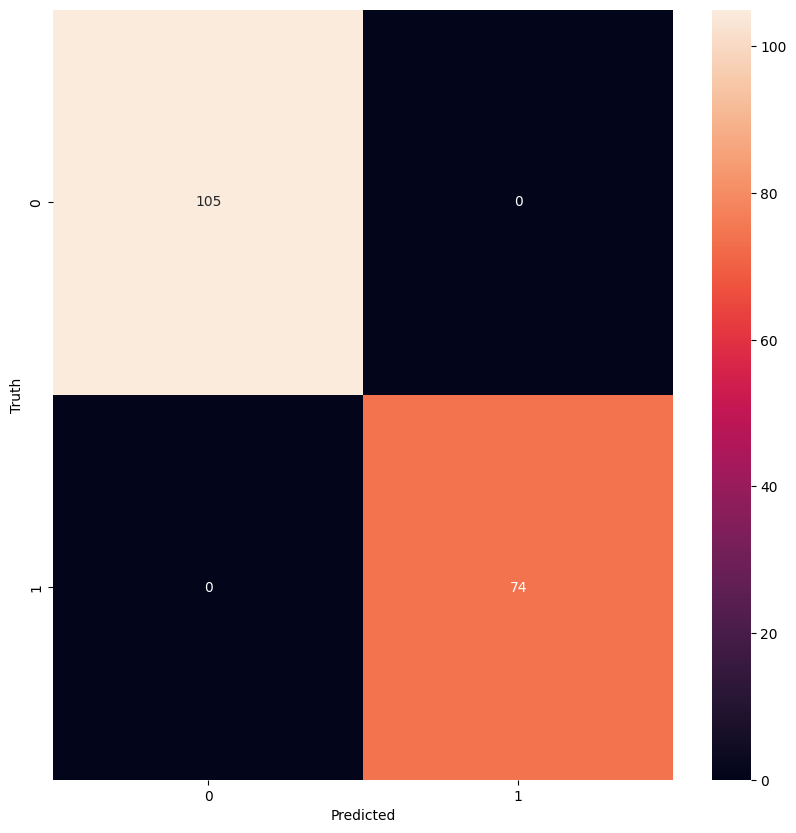

In [36]:
### Ploting Confusion metrix

plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test , y_pred) , annot =True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
### Save the model
import pickle
pickle.dump(model , open('LogisticRegression_model.pkl' , 'wb'))